# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LinearRegression():
    
    def __init__(self, variables=1):
        self.weights = np.zeros((variables+1, 1))
        
    
    def cost(self, X, y, n):
        err = X.dot(self.weights)
        err1 = y - err
        err = err1.T @ err1
        cost = err/(2*n)
        return cost
    
    def deltaJTheta(self, X, Y):
        m = X.shape[0]
        err = np.dot(X, self.weights)
        err1 = Y - err
        mid = err1 * X
        return (np.sum(mid, axis=0)/m).reshape((-1, 1))    
        
        
    def gradientDescent(self, X, y, alpha, n):
        delj = self.deltaJTheta(X, y)
        self.weights += (alpha * delj)
        
        
    def fit(self, X, y, epochs):
        n = len(X)
        for i in range(epochs):
            self.gradientDescent(X, y, 0.01, n)
            if(i%100 == 0):
                print('Loss: ', self.cost(X, y, n))
        
        
    def predict(self, X):
        y = X.dot(self.weights)
        return y
    
    
    def printweights(self):
        print(self.weights)
        

###  Simple Linear Regression

In [3]:
data = pd.read_csv('ex1data1.txt', header=None)

In [4]:
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [5]:
x = data[0].to_numpy().reshape((-1,1))
x = np.insert(x, 0, 1, axis=1)

In [6]:
y = data[1].to_numpy().reshape((-1,1))

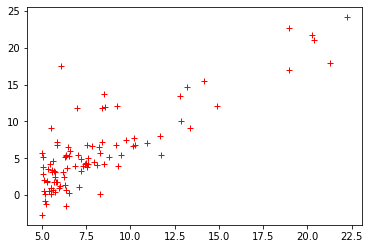

In [31]:
plt.plot(data[0], data[1], 'r+')
plt.show()

In [18]:
lin_reg = LinearRegression()

epochs = 1500
lin_reg.fit(x, y, epochs)

Loss:  [[6.73719046]]
Loss:  [[5.47636282]]
Loss:  [[5.17363455]]
Loss:  [[4.96260649]]
Loss:  [[4.81550149]]
Loss:  [[4.71295645]]
Loss:  [[4.6414736]]
Loss:  [[4.5916438]]
Loss:  [[4.55690808]]
Loss:  [[4.53269424]]
Loss:  [[4.51581508]]
Loss:  [[4.50404884]]
Loss:  [[4.49584673]]
Loss:  [[4.49012915]]
Loss:  [[4.48614349]]


In [19]:
lin_reg.printweights()

[[-3.63029144]
 [ 1.16636235]]


In [20]:
predicted_y = lin_reg.predict(x)

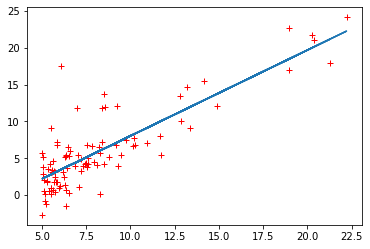

In [30]:
plt.plot(data[0], data[1], 'r+')
plt.plot(data[0], predicted_y)
plt.show()

### Multiple Linear Regression

In [146]:
X1 = np.random.normal(20, 5, 100).reshape(-1,1)
X2 = np.random.normal(77, 3.2, 100).reshape(-1,1)

In [147]:
X = np.append(X1, X2, axis=1)

In [148]:
theta = np.array([[2],[3],[1]])

In [149]:
theta

array([[2],
       [3],
       [1]])

In [150]:
Noise = np.random.rand(100, 1)

In [151]:
X.shape

(100, 2)

In [156]:
X[:, 0] = (X[:, 0]- 20)/5
X[:, 1] = (X[:, 1]-77)/3.2

In [158]:
X = np.append(np.ones((100, 1)), X, axis=1)

####  Output with Noise

In [163]:
y = X.dot(theta) + Noise

In [166]:
linear_reg = LinearRegression(2)

epochs = 10000
linear_reg.fit(X, y, epochs)

Loss:  [[8.40675208]]
Loss:  [[7.97922713]]
Loss:  [[7.57389256]]
Loss:  [[7.1895793]]
Loss:  [[6.82518077]]
Loss:  [[6.47964948]]
Loss:  [[6.15199385]]
Loss:  [[5.84127515]]
Loss:  [[5.54660469]]
Loss:  [[5.26714108]]
Loss:  [[5.0020877]]
Loss:  [[4.75069027]]
Loss:  [[4.51223456]]
Loss:  [[4.28604427]]
Loss:  [[4.07147895]]
Loss:  [[3.86793208]]
Loss:  [[3.67482928]]
Loss:  [[3.49162654]]
Loss:  [[3.3178086]]
Loss:  [[3.15288743]]
Loss:  [[2.99640075]]
Loss:  [[2.84791066]]
Loss:  [[2.70700235]]
Loss:  [[2.57328282]]
Loss:  [[2.44637977]]
Loss:  [[2.32594047]]
Loss:  [[2.2116307]]
Loss:  [[2.10313381]]
Loss:  [[2.00014971]]
Loss:  [[1.90239408]]
Loss:  [[1.80959746]]
Loss:  [[1.7215045]]
Loss:  [[1.63787318]]
Loss:  [[1.55847414]]
Loss:  [[1.48308997]]
Loss:  [[1.41151462]]
Loss:  [[1.34355274]]
Loss:  [[1.27901919]]
Loss:  [[1.21773843]]
Loss:  [[1.15954407]]
Loss:  [[1.10427832]]
Loss:  [[1.05179163]]
Loss:  [[1.00194215]]
Loss:  [[0.95459543]]
Loss:  [[0.90962394]]
Loss:  [[0.8669

In [167]:
linear_reg.printweights()

[[2.21935526]
 [2.83872583]
 [0.86536607]]


#### Output without Noise

In [160]:
y_new = X.dot(theta)

In [161]:
new_linear_reg = LinearRegression(2)

epochs = 20000
new_linear_reg.fit(X, y_new, epochs)

Loss:  [[7.40466261]]
Loss:  [[7.01682344]]
Loss:  [[6.64961854]]
Loss:  [[6.30193357]]
Loss:  [[5.9727152]]
Loss:  [[5.66096775]]
Loss:  [[5.36574999]]
Loss:  [[5.08617211]]
Loss:  [[4.8213929]]
Loss:  [[4.57061703]]
Loss:  [[4.33309254]]
Loss:  [[4.10810843]]
Loss:  [[3.89499241]]
Loss:  [[3.69310873]]
Loss:  [[3.50185623]]
Loss:  [[3.32066638]]
Loss:  [[3.14900149]]
Loss:  [[2.98635304]]
Loss:  [[2.83224006]]
Loss:  [[2.68620761]]
Loss:  [[2.54782538]]
Loss:  [[2.41668629]]
Loss:  [[2.29240526]]
Loss:  [[2.174618]]
Loss:  [[2.06297985]]
Loss:  [[1.95716472]]
Loss:  [[1.85686408]]
Loss:  [[1.761786]]
Loss:  [[1.67165423]]
Loss:  [[1.58620736]]
Loss:  [[1.50519801]]
Loss:  [[1.42839205]]
Loss:  [[1.35556792]]
Loss:  [[1.2865159]]
Loss:  [[1.22103748]]
Loss:  [[1.15894478]]
Loss:  [[1.10005993]]
Loss:  [[1.04421456]]
Loss:  [[0.99124929]]
Loss:  [[0.94101319]]
Loss:  [[0.89336339]]
Loss:  [[0.84816462]]
Loss:  [[0.80528879]]
Loss:  [[0.7646146]]
Loss:  [[0.72602718]]
Loss:  [[0.6894177

In [162]:
new_linear_reg.printweights()

[[1.97726632]
 [2.98932206]
 [0.99038385]]
